{{< include _cs-cimice.md >}}

# The `Stinkbug` dataset

# Loading the data

In [23]:
import pandas as pd
df = pd.read_csv("./datasets/cimice/captures-raw.csv", sep=',')
df

,GID,TIMESTAMP,CROP_ID,ADULTS,SMALL_INSTARS,LARGE_INSTARS,TEMPERATURE_AVG,TEMPERATURE_MAX,TEMPERATURE_MIN,HUMIDITY_AVG,HUMIDITY_MAX,HUMIDITY_MIN,PRECIPITATIONS,WINDSPEED_AVG,WINDSPEED_MAX,TOTAL_CAPTURES
0,149,2020-04-27,41,0.0,0.0,0.0,16.966669,22.683333,10.550002,63.500000,84.833333,41.500000,2.199999,1.500000,3.200000,0.0
1,144,2020-04-27,31,0.0,0.0,0.0,15.785717,22.885719,8.042862,64.571429,90.142857,39.000000,4.000001,1.657143,3.157143,0.0
2,215,2020-04-27,47,5.0,0.0,0.0,17.037496,22.787504,11.149999,53.000000,72.375000,36.250000,2.599999,2.625000,4.737500,5.0
3,222,2020-04-27,19,1.0,0.0,0.0,16.942861,23.457143,9.414279,59.857143,90.571429,38.142857,3.299999,2.857143,5.471429,1.0
4,217,2020-04-27,19,9.0,0.0,0.0,17.028571,22.885710,10.371432,58.428571,84.428571,39.571429,5.000000,2.657143,5.000000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,810,2022-10-17,19,10.0,0.0,0.0,17.687498,24.512502,12.149995,76.125000,NaN,NaN,0.200000,NaN,NaN,10.0
10945,845,2022-10-17,39,26.0,0.0,0.0,18.025003,23.975000,13.274995,76.500000,NaN,NaN,0.000000,NaN,NaN,26.0
10946,888,2022-10-17,11,1.0,0.0,0.0,16.900003,23.875002,10.900003,77.500000,NaN,NaN,0.400000,NaN,NaN,1.0
10947,885,2022-10-17,36,16.0,0.0,0.0,17.599991,23.614282,12.300003,76.857143,NaN,NaN,0.299999,NaN,NaN,16.0


# ... and then?

# How many of you apply **GenAI** (e.g., LLMs such as ChatGPT) to data science?

# (Dis)Agree? [@DBLP:journals/cacm/Welsh23]

“Programming will be obsolete. I believe the conventional idea of ‘writing a program’ is headed for extinction, and indeed, for all but very specialized applications, most software, as we know it, will be replaced by AI systems that are trained rather than programmed. In situations where one needs a ‘simple’ program (after all, not everything should require a model of hundreds of billions of parameters running on a cluster of GPUs), those programs will, themselves, be generated by an AI rather than coded by hand.”

# [@DBLP:journals/cacm/WaldoB25]

Despite their powerful capabilities, however, generative pre-trained transformers (GPTs) have the tendency to “hallucinate” responses. A hallucination occurs when an LLM-based GPT generates a response that is seemingly realistic yet is nonfactual, nonsensical, or inconsistent with the given prompt.

# How many of you use **AutoML** for training Machine Learning pipelines?

# AutoML in brief

![Repetitive tasks in ML](https://developers.google.com/static/machine-learning/crash-course/automl/images/ml-workflow.png)

Check the crash course from [Google](https://developers.google.com/machine-learning/crash-course/automl)

# AutoML in brief

![Example of Bayesian Optimization](./img/cimice/bo.png)

# [@DBLP:journals/cacm/BieRHHSW22]

"**AutoML** falls squarely into the first form of automation, mechanization [...] as it can be seen as yet another level of abstraction over a series of automation stages.

1. First, there is the well-known use of *programming for automation*.
2. Second, *machine learning automatically generates hypotheses and predictive models*, which typically take the form of algorithms (for example, in the case of a decision tree or a neural network); therefore, machine learning methods can be seen as *meta-algorithms that automate programming tasks*, and hence “automate automation.”
3. And third, *automated machine learning makes use of algorithms that select and configure machine learning algorithms*—that is, of *meta-meta-algorithms that can be understood as automating the automation of automation*."

# [@DBLP:journals/cacm/BieRHHSW22]

"The impressive performance levels reached by AutoML systems are evident in the results from recent competitions.

Notably, Auto-sklearn significantly outperformed human experts in the human track of the 2015/2016 ChaLearn AutoML Challenge."

# Do we still need data scientists?

# GenAI and AutoML

This **code was written by ChatGPT 4o** and uses **AutoML to train several models** given a specific budget

In [24]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from flaml import AutoML

X = df.drop(columns=['ADULTS'])
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

automl = AutoML()
automl_settings = {
    "time_budget": 30,  # Time budget in seconds
    "max_iter": 30,  # Max number of iterations
    "metric": 'rmse',  # Evaluation metric
    "task": 'regression',  # Task type
}
automl.fit(X_train, y_train, **automl_settings)
y_pred = automl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

[flaml.automl.logger: 04-08 20:44:01] {1728} INFO - task = regression
[flaml.automl.logger: 04-08 20:44:01] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-08 20:44:00] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 04-08 20:44:00] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 04-08 20:44:00] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-08 20:44:00] {2393} INFO - Estimated sufficient time budget=0s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-08 20:44:00] {2442} INFO -  at -0.5s,	estimator lgbm's best error=12.0178,	best estimator lgbm's best error=12.0178
[flaml.automl.logger: 04-08 20:44:00] {2258} INFO - iteration 1, current learner rf
[flaml.automl.logger: 04-08 20:44:00] {2442} INFO -  at -0.4s,	estimator rf's best error=7.9172,	best estimator rf's best error=7.9172
[flaml.automl.logger: 04-08 20:44:00] {2258} I

#

In [25]:
print("RMSE using AutoML:", round(rmse, 2))

RMSE using AutoML: 2.19


Is this error high/low?

# RMSE vs NRMSE

$RMSE = \sqrt{\frac{1}{n}\sum(y_{true}−y_{pred})^2}$

The squared differences have squared units, but the square root brings it back to the same unit as the target variable

$NRMSE = \frac{RMSE}{avg(y_{true})}$

RMSE 2.19, Mean 8.92, NRMSE 24.52%


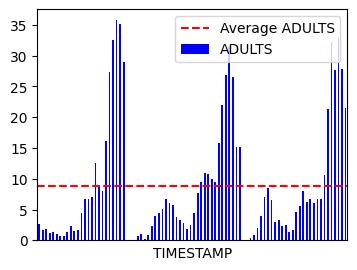

In [26]:
import matplotlib.pyplot as plt
mean_df = df.groupby('TIMESTAMP')['ADULTS'].mean()
mean_df.plot(kind='bar', figsize=(4, 3), color='blue')
plt.xticks([])  # Hide the x-axis ticks
mean = mean_df.mean()
plt.axhline(y=mean, color='red', linestyle='--', label='Average ADULTS')
plt.legend()

print(f"RMSE {rmse:.3}, Mean {mean:.3}, NRMSE {rmse / mean:.2%}")


# Let's try to better understand the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GID              10949 non-null  int64  
 1   TIMESTAMP        10949 non-null  object 
 2   CROP_ID          10949 non-null  int64  
 3   ADULTS           10949 non-null  float64
 4   SMALL_INSTARS    10949 non-null  float64
 5   LARGE_INSTARS    10949 non-null  float64
 6   TEMPERATURE_AVG  10949 non-null  float64
 7   TEMPERATURE_MAX  10949 non-null  float64
 8   TEMPERATURE_MIN  10949 non-null  float64
 9   HUMIDITY_AVG     10949 non-null  float64
 10  HUMIDITY_MAX     8180 non-null   float64
 11  HUMIDITY_MIN     8180 non-null   float64
 12  PRECIPITATIONS   10949 non-null  float64
 13  WINDSPEED_AVG    8180 non-null   float64
 14  WINDSPEED_MAX    8180 non-null   float64
 15  TOTAL_CAPTURES   10949 non-null  float64
dtypes: float64(13), int64(2), object(1)
memory usage: 1.3+ MB


# Let's try simpler models

In [28]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['ADULTS'])  # Drop the target variable 'ADULTS' from the feature set
X['TIMESTAMP'] = pd.to_datetime(X['TIMESTAMP']).astype(int) / 10**9  # Convert the 'TIMESTAMP' column to datetime and then to a Unix timestamp (seconds)
X.fillna(X.mean(), inplace=True)  # Fill missing values with the mean of each column
y = df['ADULTS']  # Define the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the dataset into training and testing sets (80% train, 20% test)
log_reg = LinearRegression()  # Initialize and train a Linear Regression model
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)  # Predict the target variable on the test set
# Calculate Root Mean Squared Error (RMSE)
rmse_log_reg = root_mean_squared_error(y_test, y_pred_log_reg)
print("RMSE using Linear Regression:", round(rmse_log_reg, 2))


RMSE using Linear Regression: 0.0


# Why?

# Let's take a look at the features. Do they ring a bell?

In [29]:
df.columns

Index(['GID', 'TIMESTAMP', 'CROP_ID', 'ADULTS', 'SMALL_INSTARS',
       'LARGE_INSTARS', 'TEMPERATURE_AVG', 'TEMPERATURE_MAX',
       'TEMPERATURE_MIN', 'HUMIDITY_AVG', 'HUMIDITY_MAX', 'HUMIDITY_MIN',
       'PRECIPITATIONS', 'WINDSPEED_AVG', 'WINDSPEED_MAX', 'TOTAL_CAPTURES'],
      dtype='object')

#

In [30]:
log_reg.coef_  # weights (coefficients) of the Linear Regression model

array([-1.36733869e-15,  9.57400348e-19,  3.29282180e-16, -1.00000000e+00,
       -1.00000000e+00, -3.97477621e-15,  2.59706955e-15,  1.71515845e-15,
        7.82904180e-16,  1.03568861e-15, -1.04128233e-15, -1.15471256e-16,
       -1.29189124e-15, -3.68890616e-17,  1.00000000e+00])

LinearRegression correctly captures this pattern, AutoML does not

`ADULTS` = - `SMALL_INSTARS` - `LARGE_INSTARS` + `TOTAL_CAPTURES`

In [31]:
equation = " ".join(f"{'' if weight < 0 else '+'}{round(weight, 2)}*{col}" for weight, col in zip(log_reg.coef_, X_train.columns) if abs(weight) > 0.01)
print(f"ADULTS = {equation}")

ADULTS = -1.0*SMALL_INSTARS -1.0*LARGE_INSTARS +1.0*TOTAL_CAPTURES


# Let's drop the `TOTAL_CAPTURES`

This was a trick, usually we do not have this type of derived features in the dataset

In [32]:
X = df.drop(columns=['ADULTS', 'TOTAL_CAPTURES'])
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
automl = AutoML()
automl_settings = {
    "time_budget": 30,  # Time budget in seconds
    "max_iter": 30,  # Max number of iterations
    "metric": 'rmse',  # Evaluation metric
    "task": 'regression',  # Task type
}
automl.fit(X_train, y_train, **automl_settings)
y_pred = automl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

[flaml.automl.logger: 04-08 20:44:12] {1728} INFO - task = regression
[flaml.automl.logger: 04-08 20:44:12] {1739} INFO - Evaluation method: holdout


[flaml.automl.logger: 04-08 20:44:12] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 04-08 20:44:12] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 04-08 20:44:12] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-08 20:44:12] {2393} INFO - Estimated sufficient time budget=582s. Estimated necessary time budget=4s.
[flaml.automl.logger: 04-08 20:44:12] {2442} INFO -  at 0.2s,	estimator lgbm's best error=14.1248,	best estimator lgbm's best error=14.1248
[flaml.automl.logger: 04-08 20:44:12] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-08 20:44:13] {2442} INFO -  at 0.2s,	estimator lgbm's best error=14.1248,	best estimator lgbm's best error=14.1248
[flaml.automl.logger: 04-08 20:44:13] {2258} INFO - iteration 2, current learner sgd
[flaml.automl.logger: 04-08 20:44:14] {2442} INFO -  at 2.1s,	estimator sgd's best error=16.9466,	best

#

In [33]:
print("RMSE using AutoML:", round(rmse, 2))

RMSE using AutoML: 11.13


In [34]:
automl.best_estimator

'lgbm'

In [35]:
automl.best_config

{'n_estimators': 99,
 'num_leaves': 15,
 'min_child_samples': 3,
 'learning_rate': np.float64(0.17402065726724145),
 'log_max_bin': 8,
 'colsample_bytree': np.float64(0.6649148062238498),
 'reg_alpha': 0.0009765625,
 'reg_lambda': np.float64(0.006761362450996487)}

# Can we do better?

From the literature, we know that the spreading of bugs depends on:

1. Cumulative degree days: $\sum_{d \in [May-Sep]} max(0, T^{avg}_d-12.2)$ [@DBLP:journals/ecoi/ForresiGGMPV24]
2. Time. How?

# Captures over time

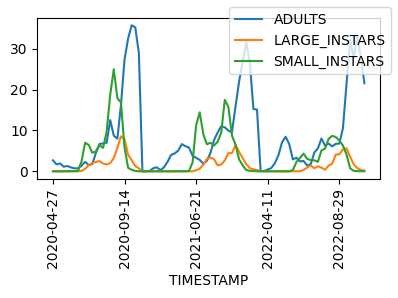

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

for c in ["ADULTS", "LARGE_INSTARS", "SMALL_INSTARS"]:
    df.groupby("TIMESTAMP")[c].mean().plot(x="TIMESTAMP", y=c, ax=ax)

plt.xticks(rotation=90)
fig.legend()
fig.tight_layout()

# Predicting Adults with past (previous) Adults

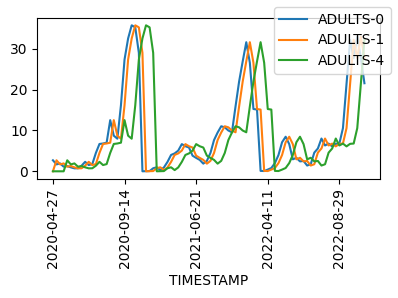

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

for c in [0, 1, 4]:
    df.groupby('TIMESTAMP')['ADULTS'].mean().shift(c).fillna(0).plot(x="ADULTS", y=c, ax=ax, label=f"ADULTS-{c}")

plt.xticks(rotation=90)
fig.legend()
fig.tight_layout()

# Preprocessing

In [38]:
df = pd.read_csv("./datasets/cimice/captures-raw.csv", sep=',')  # Load the dataset from a CSV file

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])  # Convert 'TIMESTAMP' to datetime format for time-based analysis
df.sort_values(by=['GID', 'TIMESTAMP'], inplace=True)  # Sort dataset by 'GID' (Group ID) and 'TIMESTAMP' to maintain chronological order

df['WEEK'] = df['TIMESTAMP'].dt.isocalendar().week  # Extract the week number from the timestamp for seasonal analysis

df['DEGREE_DAYS'] = df['TEMPERATURE_AVG'].apply(lambda x: max(0, x - 12.2))  # Calculate degree days: only consider temperatures above 12.2°C
df['DAYS_DIFF'] = df.groupby('GID')['TIMESTAMP'].diff().dt.days.fillna(14)  # Compute the time difference (in days) between consecutive observations per 'GID'
df['CUM_DEGREE_DAYS'] = df.groupby('GID').apply(lambda group: (group['DEGREE_DAYS'] * group['DAYS_DIFF']).cumsum()).reset_index(level=0, drop=True)  # Compute cumulative degree days for each 'GID' (sum of DEGREE_DAYS * DAYS_DIFF)

df['ADULTS-1'] = df.groupby('GID')['ADULTS'].shift(1).fillna(0)  # Create a lag feature: previous 'ADULTS' count for each 'GID', fill missing values with 0

df['TIMESTAMP'] = df['TIMESTAMP'].astype(int) / 10**9  # Convert 'TIMESTAMP' to Unix timestamp (seconds) for numerical processing

df.fillna(df.groupby('WEEK').transform('mean'), inplace=True)  # Fill missing values using the mean of each column, grouped by 'WEEK'

df.drop(columns=['TOTAL_CAPTURES'], inplace=True)
X = df.drop(columns=['ADULTS'])
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()

/tmp/ipykernel_630/1366692687.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['CUM_DEGREE_DAYS'] = df.groupby('GID').apply(lambda group: (group['DEGREE_DAYS'] * group['DAYS_DIFF']).cumsum()).reset_index(level=0, drop=True)  # Compute cumulative degree days for each 'GID' (sum of DEGREE_DAYS * DAYS_DIFF)


,GID,TIMESTAMP,CROP_ID,ADULTS,SMALL_INSTARS,LARGE_INSTARS,TEMPERATURE_AVG,TEMPERATURE_MAX,TEMPERATURE_MIN,HUMIDITY_AVG,HUMIDITY_MAX,HUMIDITY_MIN,PRECIPITATIONS,WINDSPEED_AVG,WINDSPEED_MAX,WEEK,DEGREE_DAYS,DAYS_DIFF,CUM_DEGREE_DAYS,ADULTS-1
7,24,1.587946e+09,47,2.0,0.0,0.0,16.871423,23.171424,9.642855,61.142857,84.571429,41.285714,3.199999,2.114286,3.885714,18,4.671423,14.0,65.399927,0.0
43,24,1.588550e+09,47,1.0,0.0,0.0,16.700002,22.900001,9.314286,62.714286,86.857143,37.714286,0.000000,2.014286,3.728571,19,4.500002,7.0,96.899939,2.0
194,24,1.589155e+09,47,1.0,0.0,0.0,18.485712,24.899997,12.028571,65.857143,87.571429,42.714286,3.199997,1.885714,3.514286,20,6.285712,7.0,140.899921,1.0
358,24,1.589760e+09,47,2.0,0.0,0.0,19.362497,24.737505,13.624998,67.875000,89.375000,46.250000,2.000004,1.762500,3.237500,21,7.162497,7.0,191.037399,1.0
453,24,1.590365e+09,47,0.0,0.0,0.0,19.699996,25.883335,11.683333,55.333333,84.500000,32.500000,2.600000,2.033333,3.816667,22,7.499996,7.0,243.537371,2.0


# Average temperature vs cumulative degree days

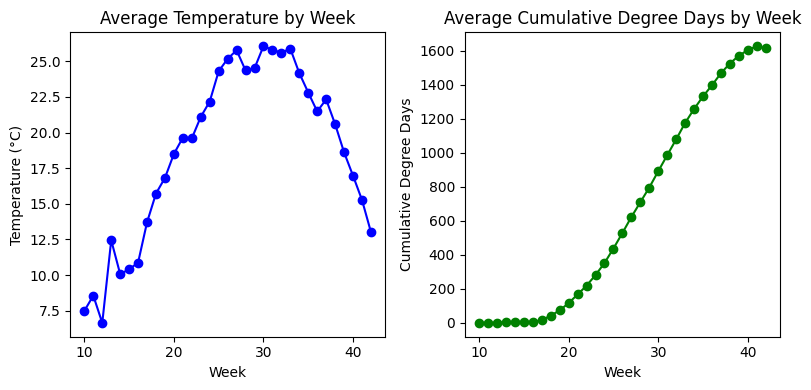

In [39]:
import matplotlib.pyplot as plt
# Calculate weekly averages for temperature and cumulative degree days
weekly_avg_temp = df.groupby('WEEK')['TEMPERATURE_AVG'].mean()
weekly_avg_cum_degree_days = df.groupby('WEEK')['CUM_DEGREE_DAYS'].mean()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Create subplots
axes[0].plot(weekly_avg_temp.index, weekly_avg_temp.values, marker='o', color='blue')  # Plot average temperature by week
axes[0].set_title('Average Temperature by Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Temperature (°C)')
axes[1].plot(weekly_avg_cum_degree_days.index, weekly_avg_cum_degree_days.values, marker='o', color='green')  # Plot average cumulative degree days by week
axes[1].set_title('Average Cumulative Degree Days by Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Cumulative Degree Days')
plt.tight_layout()

# Data understanding

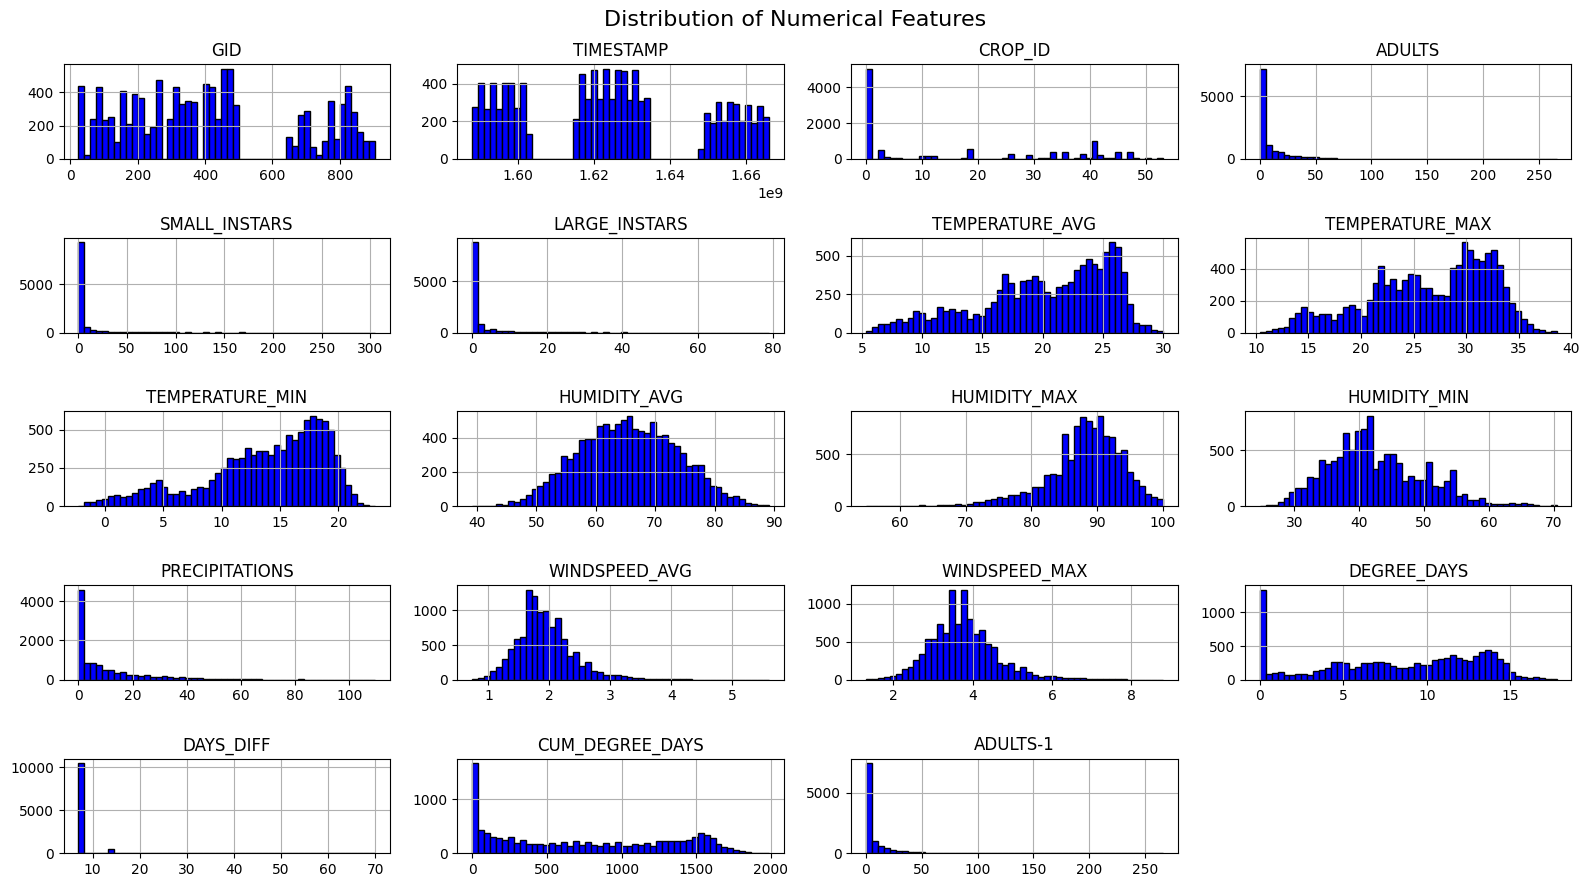

In [40]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
df[numerical_columns].hist(bins=50, figsize=(16, 9), color='blue', edgecolor='black')  # Plot histograms for numerical columns
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()

# Data understanding

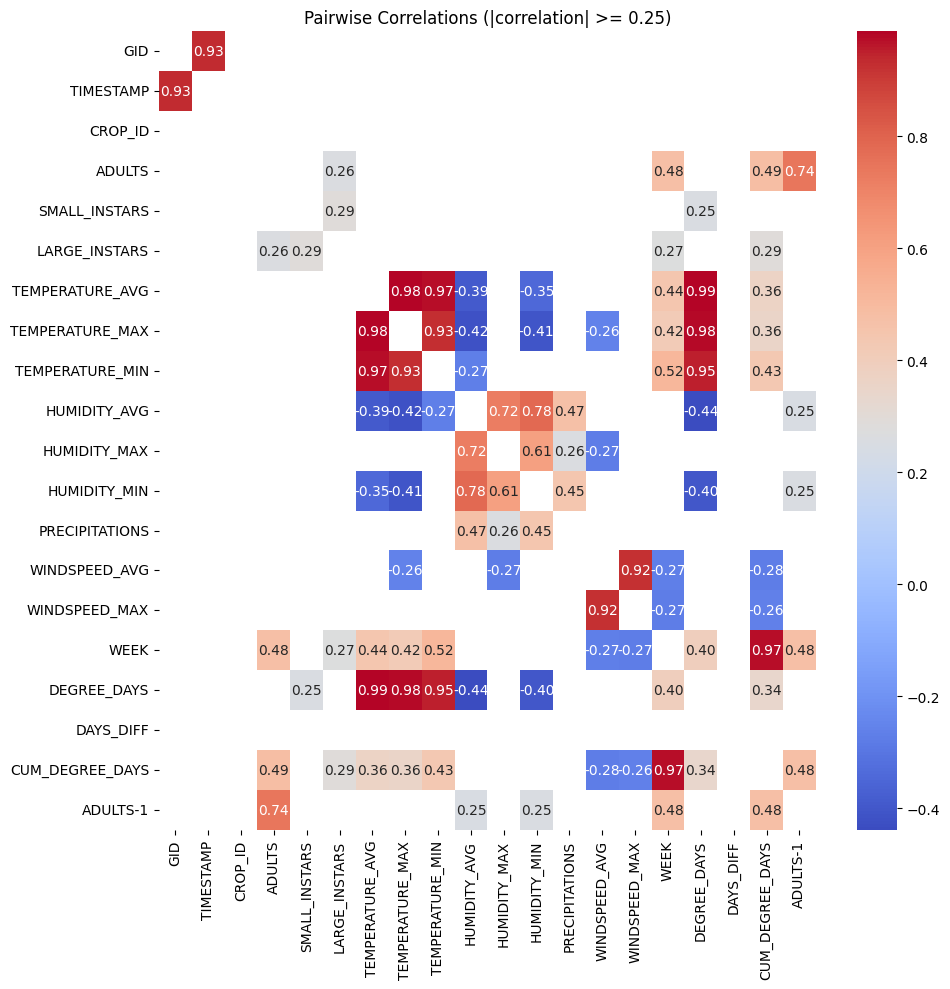

In [41]:
import seaborn as sns
import numpy as np
correlation_matrix = df.corr()  # Compute the correlation matrix
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() >= 0.25]  # Mask correlations with absolute values below 0.25
filtered_correlation_matrix[np.eye(filtered_correlation_matrix.shape[0], dtype=bool)] = np.nan  # Mask the diagonal
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Correlations (|correlation| >= 0.25)")
plt.tight_layout()

# Plotting the correlations

<Figure size 1000x1000 with 0 Axes>

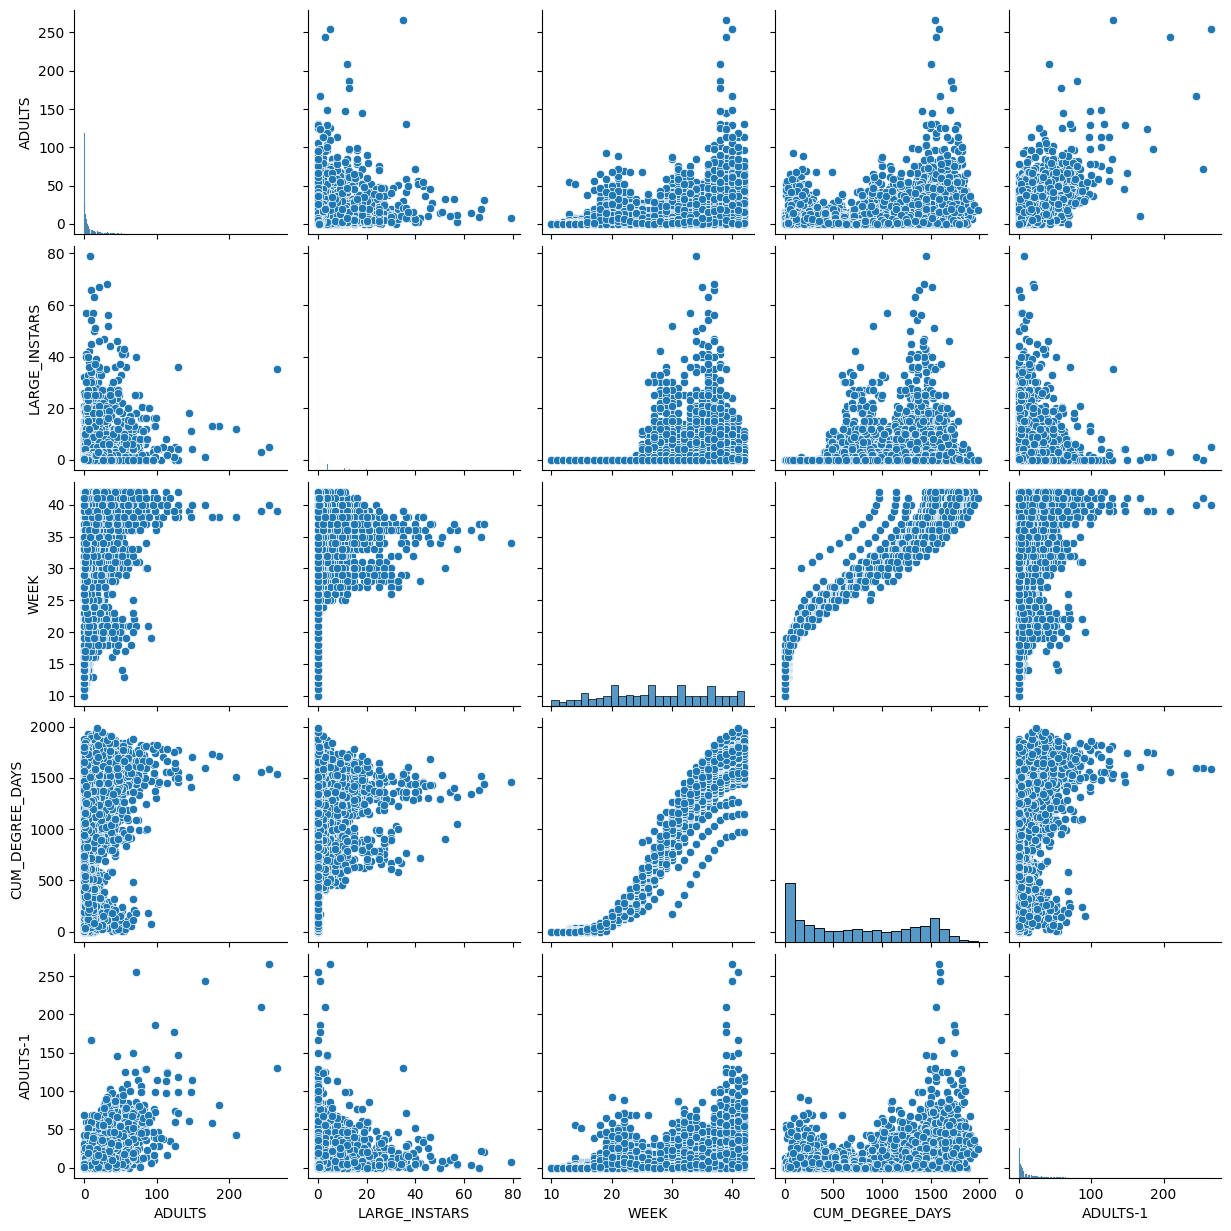

In [43]:
plt.figure(figsize=(10, 10))
sns.pairplot(df[["ADULTS" , "LARGE_INSTARS", "WEEK", "CUM_DEGREE_DAYS", "ADULTS-1"]])

# Let's apply simple models

In [44]:
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
rmse_log_reg = root_mean_squared_error(y_test, y_pred_log_reg)
print("RMSE using Logistic Regression:", round(rmse_log_reg, 2))

RMSE using Logistic Regression: 9.88


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print("RMSE using Random Forest Regressor:", round(rmse_rf, 2))

RMSE using Random Forest Regressor: 9.57


# Let's do hyper-parameter tuning on RF

In [46]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)  # Define the base model
param_dist = {  # Define the hyperparameter grid
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)  # Use RandomizedSearchCV for rough tuning
random_search.fit(X_train, y_train)  # Best parameters from Randomized Search
best_model = random_search.best_estimator_
y_pred_rf = best_model.predict(X_test)  # Make predictions
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)  # Compute RMSE

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   2.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, max_features=sqrt, 

#

In [47]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [48]:
random_search.best_estimator_


RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=200,
                      random_state=42)

In [49]:
print("Optimized RMSE using Random Forest Regressor:", round(rmse_rf, 2))

Optimized RMSE using Random Forest Regressor: 9.49


# Let's try more complex models

In [50]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Define base XGBoost model
param_dist = {  # Define hyperparameter grid
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}
# Perform Randomized Search for broad tuning
random_search = RandomizedSearchCV(
    estimator=xgb_regressor, param_distributions=param_dist,
    n_iter=30, cv=5, scoring='neg_root_mean_squared_error',
    verbose=2, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)  # Get best parameters from Randomized Search
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)  # Make predictions
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)  # Compute RMSE

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsa

#

In [51]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [52]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
print("Optimized RMSE using XGBoost:", round(rmse_xgb, 2))

Optimized RMSE using XGBoost: 9.48


# Plotting feature importance

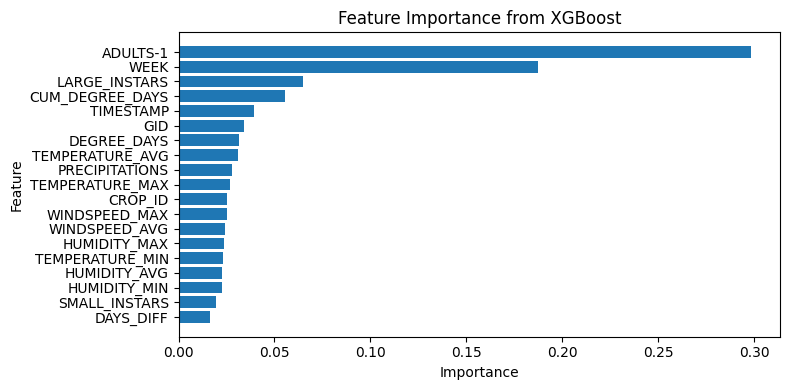

In [54]:
feature_importance = best_xgb.feature_importances_  # Get feature importance
feature_importance_df = pd.DataFrame({ 'Feature': X_train.columns, 'Importance': feature_importance }).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()

# Let's retry AutoML

In [55]:
automl = AutoML()
automl_settings = {
    "time_budget": 30,  # Time budget in seconds
    "max_iter": 30,  # Max number of iterations
    "metric": 'rmse',  # Evaluation metric
    # "estimator_list": ["xgboost"],
    "task": 'regression',  # Task type
}
automl.fit(X_train, y_train, **automl_settings)
y_pred = automl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

[flaml.automl.logger: 04-08 20:50:07] {1728} INFO - task = regression
[flaml.automl.logger: 04-08 20:50:07] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-08 20:50:07] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 04-08 20:50:07] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 04-08 20:50:07] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-08 20:50:07] {2393} INFO - Estimated sufficient time budget=561s. Estimated necessary time budget=4s.
[flaml.automl.logger: 04-08 20:50:07] {2442} INFO -  at 0.2s,	estimator lgbm's best error=13.7019,	best estimator lgbm's best error=13.7019
[flaml.automl.logger: 04-08 20:50:07] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-08 20:50:07] {2442} INFO -  at 0.3s,	estimator lgbm's best error=13.7019,	best estimator lgbm's best error=13.7019
[flaml.automl.logger: 04-08 20:50:07] 

#

In [56]:
automl.best_estimator

'lgbm'

In [57]:
automl.best_config

{'n_estimators': 34,
 'num_leaves': 4,
 'min_child_samples': 4,
 'learning_rate': np.float64(0.41929025492645006),
 'log_max_bin': 8,
 'colsample_bytree': np.float64(0.7610534336273627),
 'reg_alpha': 0.0009765625,
 'reg_lambda': np.float64(0.009280655005879927)}

In [58]:
print("RMSE using AutoML:", round(rmse, 2))

RMSE using AutoML: 9.77


# Questions

- Can this model generalize to any country? E.g., to Australia

# References